# Classification of flowers based on given data

## A neural network model to classify flowers into their respective species based on some parameters (presented in the iris.csv dataset)

### Prepare the dataset for deep learning

1. Load the data into a pandas dataframe

In [1]:
# Load the iris dataset into a pandas dataframe
import pandas as pd

iris_dataframe = pd.read_csv("data/iris.csv")
print(f"Iris dataframe:\n{iris_dataframe}")

Iris dataframe:
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


2. Convert the string target variable "Species" into a numeric format

In [2]:
# sklearn label encoder converts string into numeric values
# We will use the library to convert the "species" feature set, which is our target variable, into numeric values
# This makes the data usable by our model
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
iris_dataframe["Species"] = label_encoder.fit_transform(iris_dataframe["Species"])

# Convert the data into numpy array
iris_numpy_array = iris_dataframe.to_numpy()

3. Spilt the array dataset into feature and target variable

In [3]:
# X represents feature variables and Y represents target variables
"""
[a , b] = select row index "a" and column index "b" respectively from a numpy array

[0:a , :b] = select first "a" rows and first "b" columns (both representations are similar]

[: , :] = select all rows and columns

[a:x , b:y] = select all rows from row index "a" to row index "x" and select all columns from column index "b" to column index "y"

[:-x , -y] = select all rows except the last "x" rows and select last "y" columns
"""
X_data = iris_numpy_array[:, 0:4]       # Select all rows and first 4 columns
Y_data = iris_numpy_array[:, 4]         # Select all rows and 4th column index ("Species" target feature)

print(f"Features before scaling:\n{X_data[:5, :]}\n")       # Print the features of first 5 rows and all corresponding columns
print(f"Target before scaling:\n{Y_data[:5]}\n")            # Print the first 5 instances of the target ("Y_data") array

Features before scaling:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling:
[0. 0. 0. 0. 0.]



4. Scale the input dataset

In [4]:
# From the feature variables, it can be seen that they need to scaled to the same level to be used by the neural network model
# We will use the StandardScaler() from the sklearn library for this purpose
# We use the one-hot encoding function on the target variable as this is a multi-class classification problem
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Create a scaler model that is fit on the input data
scaler_model = StandardScaler().fit(X_data)

# Scale the numeric feature variables
X_data = scaler_model.transform(X_data)

# Scale the target variable as one-hot encoding array
Y_data = tf.keras.utils.to_categorical(Y_data, 3)   # We created 3 columns, each of which represents a species ("setosa", "versicolor" and "virginica") as shown in the dataset

print(f"Features after classification:\n{X_data[:5, :]}\n")
print(f"Target after one-hot encoding:\n{Y_data[:5, :]}\n")

Features after classification:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after one-hot encoding:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]



5. Split the scaled dataset into training and testing dataset

In [5]:
from sklearn.model_selection import train_test_split

# Split the training dataset into testing and training dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.1)      # Use 10% of the entire dataset for testing dataset

### Create the Neural Network model

In [6]:
from tensorflow import keras

class_num = 3       # There are 3 classes of flowers in the dataset
neural_network_model = tf.keras.models.Sequential()     # Creating a sequential model

# FIRST HIDDEN LAYER
neural_network_model.add(keras.layers.Dense(128,    # 128 nodes
                             input_shape=(4,),      # Provide with 4 inputs (sepal length and width, petal length and width
                             name='first_hidden_layer',
                             activation='relu'))    # Rectified linear unit activation function

# SECOND HIDDEN LAYER
neural_network_model.add(keras.layers.Dense(128,
                             name='second_hidden_layer',
                             activation='relu'))

# OUTPUT LAYER
neural_network_model.add(keras.layers.Dense(class_num,      # Number of classes of target variable (setosa, versicolor, virginica)
                             name='output_layer',
                             activation='softmax'))         # Activation function

# Compile model uses categorical_crossentropy as this is a multi-class classification model
# We will measure the accuracy. Our aim is to have greater accuracy
neural_network_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
summary = neural_network_model.summary()
print("=================================================================\nFirst hidden layer has 128 nodes and 640 parameters\nParameter = weight + bias\nWeight = input * node (4 * 128 = 512)\nBias = Number of nodes (128)\nThus the parameters = 512 + 128 = 640\nSimilar case is present in all the layers")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden_layer (Dense)  (None, 128)               640       
                                                                 
 second_hidden_layer (Dense)  (None, 128)              16512     
                                                                 
 output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________
First hidden layer has 128 nodes and 640 parameters
Parameter = weight + bias
Weight = input * node (4 * 128 = 512)
Bias = Number of nodes (128)
Thus the parameters = 512 + 128 = 640
Similar case is present in all the layers


### Train and evaluate the model

Epoch 1/20
4/4 [==============================] - 2s 146ms/step - loss: 0.8854 - accuracy: 0.7315 - val_loss: 0.6501 - val_accuracy: 0.7407
Epoch 2/20
4/4 [==============================] - 0s 26ms/step - loss: 0.6051 - accuracy: 0.8333 - val_loss: 0.5274 - val_accuracy: 0.7407
Epoch 3/20
4/4 [==============================] - 0s 26ms/step - loss: 0.4935 - accuracy: 0.8241 - val_loss: 0.4695 - val_accuracy: 0.7407
Epoch 4/20
4/4 [==============================] - 0s 29ms/step - loss: 0.4293 - accuracy: 0.8241 - val_loss: 0.4104 - val_accuracy: 0.7778
Epoch 5/20
4/4 [==============================] - 0s 28ms/step - loss: 0.3909 - accuracy: 0.8519 - val_loss: 0.4073 - val_accuracy: 0.7778
Epoch 6/20
4/4 [==============================] - 0s 26ms/step - loss: 0.3574 - accuracy: 0.8333 - val_loss: 0.3683 - val_accuracy: 0.7778
Epoch 7/20
4/4 [==============================] - 0s 21ms/step - loss: 0.3329 - accuracy: 0.8611 - val_loss: 0.3560 - val_accuracy: 0.7778
Epoch 8/20
4/4 [==========

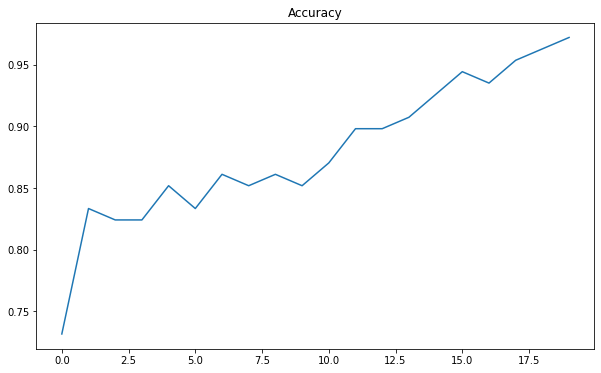

1/1 [==============================] - 0s 62ms/step - loss: 0.0537 - accuracy: 1.0000


[0.05365125462412834, 1.0]

In [7]:
# For training a model, we need to pass the entire training dataset into the model
# Since the entirety of the dataset is too large, we break it down into smaller portions called "Batches"
# Multiple batches like this constitute an "Epoch"
# One epoch means the entire dataset has been passed forward and backward once through the NN model

import matplotlib.pyplot as plt

# Create the model and store results in model_data
trained_model=neural_network_model.fit(X_train, Y_train,
                                       batch_size=32,           # We will split the training dataset into 32 batches
                                       epochs=20,               # There will be 10 epochs to marl the completion of NN model training
                                       verbose=1,               # Enable verbose logging
                                       validation_split=0.2)    # Validation split marks the portion of the training data used to validate the results of the NN model after each epoch. Here 20% of the training data is used

# Plot accuracy of the model after each epoch.
pd.DataFrame(trained_model.history)["accuracy"].plot(figsize=(10, 6))
plt.title("Accuracy")
plt.show()

#Evaluate the model against the test dataset and print results
neural_network_model.evaluate(X_test,Y_test)

### Save the model for use

In [8]:
# https://stackoverflow.com/a/42121886
# To disable the INFO spam in summary logs

# Save model
neural_network_model.save("iris_prediction")

# Load model
saved_iris_model = keras.models.load_model("iris_prediction")

# Print model summary
saved_iris_model.summary()

INFO:tensorflow:Assets written to: iris_prediction\assets
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden_layer (Dense)  (None, 128)               640       
                                                                 
 second_hidden_layer (Dense)  (None, 128)              16512     
                                                                 
 output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


### Test the NN model

In [9]:
import numpy as np

# Prediction data (sepal length, sepal width, petal length, petal width)
prediction_input = [[6.6, 3.1 , 4.4, 1.4]]

# Scale the prediction with the scaled model created before
scaled_input = scaler_model.transform(prediction_input)

# Get raw prediction probabilities
raw_prediction = neural_network_model.predict(scaled_input)
print("Raw prediction probabilities:" , raw_prediction)

# Predict result
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 172ms/step
Raw prediction probabilities: [[0.02186031 0.724861   0.25327867]]
Prediction is  ['versicolor']
